##  Lung cancer nodule count (resub)
In this notebook measurements from 165 lung cancer patients are analysed and a model that predicts a patients lung cancer nodule count is created using these measurements.


#### Investigating the data:

I did the codes below so that I can see the descriptions of the measurements made on the lung cancer patients hoping that this will give me insights on how to go about doing the statistical analysis to take full advantage of the data and to use an appropitate machine learning model.

In [2]:
# get the name of the data and data description file
!ls

hcc-data.txt  hcc-description.txt  lung_caner_nodules.ipynb  README.md


In [3]:
# display the data desription
!cat hcc-description.txt

{\rtf1\ansi\ansicpg1252\cocoartf1504\cocoasubrtf830
{\fonttbl\f0\fmodern\fcharset0 Courier;}
{\colortbl;\red255\green255\blue255;}
{\*\expandedcolortbl;;}
\paperw11900\paperh16840\margl1440\margr1440\vieww25100\viewh13180\viewkind0
\deftab720
\pard\pardeftab720\partightenfactor0

\f0\fs26 \cf0 \expnd0\expndtw0\kerning0
Citation Request:\
Please include this citation if you plan to use this database:\
\
\pard\pardeftab720\partightenfactor0
\cf0 \kerning1\expnd0\expndtw0 Miriam Seoane Santos, Pedro Henriques Abreu, Pedro J. Garc\'eda-Laencina, Ad\'e9lia Sim\'e3o, Armando Carvalho, \'93A new cluster-based oversampling method for improving survival prediction of hepatocellular carcinoma patients\'94, Journal of biomedical informatics, 58, 49-59, 2015.\expnd0\expndtw0\kerning0
\
\
\
1. Title: Hepatocellular Carcinoma Dataset (HCC dataset) \
\
2. Source Information\
   -- Donors of database: \
	\kerning1\expnd0\expndtw0 Miriam Seoane Santos (miriams@student.dei.uc.pt)\
	Pedro Henriques Abreu

###### Findings:
- From the information above I see that the data is consisnts of continuous measurements and some categorical varibles, from this infomation I decided to use Linear Regression model for the machine earning model.


- As can be seen from the data description above there are 50 attributes however most of these attributes are categorical(binary varibles) which I thought will not help to create an effective machine learning model so I have decided to limit the attributes from 50 to 21 as I only included the continous measurements made.


- from the description I also found that there are some missing entries in some of the attributes labelled with '?'


In [4]:
!cat hcc-data.txt

- I called the **' !cat '** command on the data to see if it has header and as seen from above it doesnt have any headers. This means that I have to mannually add column names but in able to do this I need to put the data into ** pandas dataframe ** first so that I can use its functions to easily manipulate the data. The codes in the next four cells will do these steps.

In [5]:
# import pandas library
import pandas as pd

In [6]:
# put data into pandas data frame
df = pd.read_csv('hcc-data.txt', delimiter = ',' , header = None) 

In [7]:
#remove unused attributes from the dataframe
df = df.loc[ : ,[30 , 31 , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39 ,  40,  41 ,  42, 45 , 46 , 48 , 23 , 24 , 25 , 43 , 47]]

In [8]:
# add column names as the attributes name
df.columns = [ 'Alpha_Fetoprotein' , 'Haemoglobin' , 'Mean_Corpuscular_Volume' , 'Leukocytes' , 'Platelets' , 'Albumin' ,  'Bilirubin' , 'Alanine_transaminase' ,  'Aspartate_transaminase', 'Gamma_glutamyl_transferase' , 'Alkaline_phosphatase' ,'Total_Proteins' ,  'Creatinine' ,  'Direct_Bilirubin', 'Iron' , 'Ferritin'  ,'age_when_diagnosed' , 'grams_of_alcohol_per_day' , 'packs_of_cigarets_per_day' , 'number_of_nodules' , 'oxygen_saturation']

In [9]:
#check the columns are renamed
df.head()

,Alpha_Fetoprotein,Haemoglobin,Mean_Corpuscular_Volume,Leukocytes,Platelets,Albumin,Bilirubin,Alanine_transaminase,Aspartate_transaminase,Gamma_glutamyl_transferase,...,Total_Proteins,Creatinine,Direct_Bilirubin,Iron,Ferritin,age_when_diagnosed,grams_of_alcohol_per_day,packs_of_cigarets_per_day,number_of_nodules,oxygen_saturation
0,95,13.7,106.6,4.9,99,3.4,2.1,34,41,183,...,7.1,0.7,0.5,?,?,67,137,15,1,?
1,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,62,0,?,1,?
2,5.8,8.9,79.8,8.4,472,3.3,0.4,58,68,202,...,7,2.1,0.1,28,16,78,50,50,5,6
3,2440,13.4,97.1,9,279,3.7,0.4,16,64,94,...,8.1,1.11,0.2,?,?,77,40,30,2,?
4,49,14.3,95.1,6.4,199,4.1,0.7,147,306,173,...,6.9,1.8,?,59,22,76,100,30,1,15


### Cleaning the Data

In [10]:
# check for missing entries in the data
df.isnull().values.any()

False

- as we need to clean the data we need to check for missing entries in the data frame and remove these. The cell above checks for any missing entries or nulls. As we can see the output of the cell is **False** this means that there are no missing entries however we know that there are missing entries in the data by reading the data description earlier. The reason why the output of the code above is False is because the missing entries are replaced with **'?'** which was indicated in the data description and we saw these when we called the **'head()'** fucntion earlier. The head() function returns the first 5 rows in the dataset by default.

In [11]:
#check the total count of data
df.shape

(165, 21)

- I displayed the attribute **'shape'** from the dataframe above to see the total count of row in the data. The output from above gives **(165,21)** this means there are currentlty 165 rows and 21 columns in the dataset. I wanted to know this information before I removed the missing entries to see how much of these rows will be left after I removed the missing entries.


- the next cell will make the **'?'** entries as nulls as far as pandas is concencred. I did this step to help me quantify the missing entries in each column by typing codes like **'df.isnull().sum()'** which will count all the missing entries in each column

In [12]:
#replace the missing entries '?' with "NaN" to help remove them later
df = df[df != '?']

In [13]:
#confirm the '?' are replace with NaN
df.head()

,Alpha_Fetoprotein,Haemoglobin,Mean_Corpuscular_Volume,Leukocytes,Platelets,Albumin,Bilirubin,Alanine_transaminase,Aspartate_transaminase,Gamma_glutamyl_transferase,...,Total_Proteins,Creatinine,Direct_Bilirubin,Iron,Ferritin,age_when_diagnosed,grams_of_alcohol_per_day,packs_of_cigarets_per_day,number_of_nodules,oxygen_saturation
0,95,13.7,106.6,4.9,99,3.4,2.1,34,41,183,...,7.1,0.7,0.5,NaN,NaN,67,137,15,1,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,62,0,NaN,1,NaN
2,5.8,8.9,79.8,8.4,472,3.3,0.4,58,68,202,...,7,2.1,0.1,28,16,78,50,50,5,6
3,2440,13.4,97.1,9,279,3.7,0.4,16,64,94,...,8.1,1.11,0.2,NaN,NaN,77,40,30,2,NaN
4,49,14.3,95.1,6.4,199,4.1,0.7,147,306,173,...,6.9,1.8,NaN,59,22,76,100,30,1,15


In [14]:
#confirm the '?' are replace with NaN
df.isnull().sum()

Alpha_Fetoprotein              8
Haemoglobin                    3
Mean_Corpuscular_Volume        3
Leukocytes                     3
Platelets                      3
Albumin                        6
Bilirubin                      5
Alanine_transaminase           4
Aspartate_transaminase         3
Gamma_glutamyl_transferase     3
Alkaline_phosphatase           3
Total_Proteins                11
Creatinine                     7
Direct_Bilirubin              44
Iron                          79
Ferritin                      80
age_when_diagnosed             0
grams_of_alcohol_per_day      48
packs_of_cigarets_per_day     53
number_of_nodules              2
oxygen_saturation             80
dtype: int64

- The code in the cell above will output the  coulmn name and the sum of missing entries in each rows. As seen on the output above the columns **'Iron' , 'Ferretin' , 'Direct_Bilirubin' , 'grams_of_alcohol_per_day' , 'packs_of_cigarets_per_day' and 'oxygen_saturation'** have significant amount of missing entries in them. If I remove the missing entries in these coulmns approximately half of the data will be gone so I decided to removed these columns in the data frame instead. As for why we need to remove these , we need a signifacant amount of data to train and test the machine learing model. The code in the next cell will remove the columns with lots of '?'



- Its important to note however that we do not nessesarily need to remove these columns if we had extra source of unique data. In fact removing these columns may prove to be detrimental in creating the machine learning model in a way that they might have a strong relationsip with the attribute we are trying to predict. However in this case I kept it simple and just removed them.

In [15]:
# remove the columns with lots of null
df= df.drop( ['Direct_Bilirubin' , 'Iron' , 'Ferritin' , 'grams_of_alcohol_per_day' , 'packs_of_cigarets_per_day' , 'oxygen_saturation'], axis=1)

#display a sample of new dataframe
df.head()

,Alpha_Fetoprotein,Haemoglobin,Mean_Corpuscular_Volume,Leukocytes,Platelets,Albumin,Bilirubin,Alanine_transaminase,Aspartate_transaminase,Gamma_glutamyl_transferase,Alkaline_phosphatase,Total_Proteins,Creatinine,age_when_diagnosed,number_of_nodules
0,95,13.7,106.6,4.9,99,3.4,2.1,34,41,183,150,7.1,0.7,67,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,1
2,5.8,8.9,79.8,8.4,472,3.3,0.4,58,68,202,109,7,2.1,78,5
3,2440,13.4,97.1,9,279,3.7,0.4,16,64,94,174,8.1,1.11,77,2
4,49,14.3,95.1,6.4,199,4.1,0.7,147,306,173,109,6.9,1.8,76,1


- Now we are ready to remove the rows where there are missing entries. The next cell below will do this.

In [16]:
#remove rows with missing entry
df = df.dropna(how = 'any')

In [17]:
#confirm the missing entries are removed
df.isnull().sum()

Alpha_Fetoprotein             0
Haemoglobin                   0
Mean_Corpuscular_Volume       0
Leukocytes                    0
Platelets                     0
Albumin                       0
Bilirubin                     0
Alanine_transaminase          0
Aspartate_transaminase        0
Gamma_glutamyl_transferase    0
Alkaline_phosphatase          0
Total_Proteins                0
Creatinine                    0
age_when_diagnosed            0
number_of_nodules             0
dtype: int64

In [18]:
#check the count of remaining data
df.shape

(142, 15)

- As seen from the output from the code **'df.isnull().sum()'** above , which returns the sum of null values in each column we have succefully removed the missing entries from the dataframe as all values in the output are zero


- Also note from the output of **'df.shape'** above, which returns the total count of rows and column , we see that we still have a significan amount of data left **(from 165 rows to 142 rows)** after removing the rows with missing entries.

In [19]:
df.dtypes

Alpha_Fetoprotein             object
Haemoglobin                   object
Mean_Corpuscular_Volume       object
Leukocytes                    object
Platelets                     object
Albumin                       object
Bilirubin                     object
Alanine_transaminase          object
Aspartate_transaminase        object
Gamma_glutamyl_transferase    object
Alkaline_phosphatase          object
Total_Proteins                object
Creatinine                    object
age_when_diagnosed             int64
number_of_nodules             object
dtype: object

- I did the code int the cell above to check the data types ( int , float .. etc ) of all the attributes in the current dataFrame. As we can see from the output the code returns **'Object'** which is string data type we know that we cannot use this as input in the machine learning model to train it so we need to change the data types of each attribute approprietely. In this case I have decided to change all the data types of all attributes into type float as they are most of them are continous data. The codes in the next cell below implement this changes and checks them.

- The output of the code **df.dtypes** below returns **float64**  for all the columns, this means that we have succesfully changed the datatypes into floats which can store continous data.

In [20]:
# change the dataType into float
df = df.astype(float)

#checks the dataType
df.dtypes

Alpha_Fetoprotein             float64
Haemoglobin                   float64
Mean_Corpuscular_Volume       float64
Leukocytes                    float64
Platelets                     float64
Albumin                       float64
Bilirubin                     float64
Alanine_transaminase          float64
Aspartate_transaminase        float64
Gamma_glutamyl_transferase    float64
Alkaline_phosphatase          float64
Total_Proteins                float64
Creatinine                    float64
age_when_diagnosed            float64
number_of_nodules             float64
dtype: object

### Statistical analysis and data visualisation

In [21]:
#import libraries for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


- I did the codes in the next two cells below to make a quick exploratory analaysis on the data.

In [22]:
# show Exploratory analysis measurements
df.describe()

,Alpha_Fetoprotein,Haemoglobin,Mean_Corpuscular_Volume,Leukocytes,Platelets,Albumin,Bilirubin,Alanine_transaminase,Aspartate_transaminase,Gamma_glutamyl_transferase,Alkaline_phosphatase,Total_Proteins,Creatinine,age_when_diagnosed,number_of_nodules
count,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2.131170e+04,12.866197,95.088732,1438.045148,111763.089507,3.461197,2.935282,66.471831,95.823944,266.572535,213.459718,8.501408,1.070423,65.007042,2.767606
std,1.566925e+05,2.096532,8.430484,2918.979989,105970.927382,0.680783,4.844986,57.530836,86.127837,257.519867,171.949447,9.330686,0.768919,13.020713,1.812742
min,1.200000e+00,5.000000,69.500000,2.200000,1.710000,1.900000,0.300000,11.000000,17.000000,23.000000,1.280000,4.300000,0.200000,20.000000,0.000000
25%,5.250000e+00,11.425000,89.625000,5.125000,213.000000,3.100000,0.800000,30.250000,47.000000,90.250000,106.000000,6.400000,0.700000,58.000000,1.000000
50%,4.000000e+01,13.050000,95.100000,7.200000,93000.000000,3.420000,1.400000,50.000000,73.500000,178.500000,159.500000,7.100000,0.855000,66.000000,2.000000
75%,6.510000e+02,14.550000,100.950000,15.400000,171500.000000,4.100000,2.875000,76.750000,111.750000,348.000000,265.250000,7.500000,1.100000,74.000000,5.000000
max,1.810346e+06,16.600000,119.600000,13000.000000,459000.000000,4.900000,32.300000,420.000000,553.000000,1575.000000,980.000000,78.000000,6.100000,93.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02426fc668>,
      dtype=object)

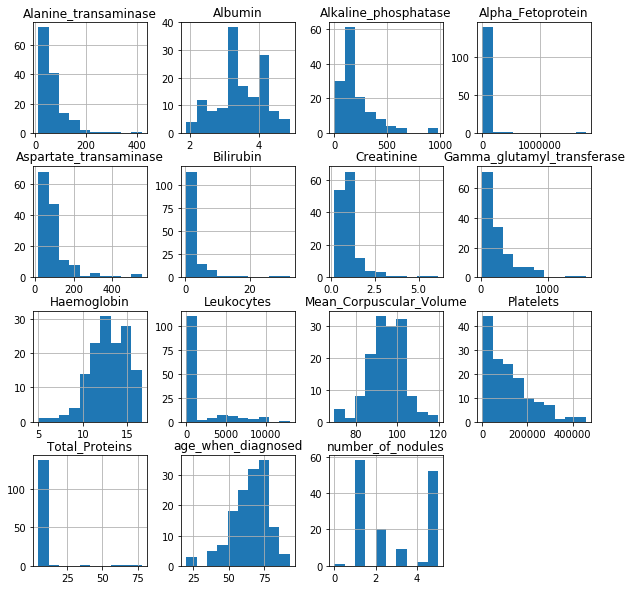

In [23]:
# plot histogram grapgh of all attributes in the data
df.hist(figsize = ( 10 , 10))

- Looking at the output of the code **'df.describe()'** above , which gives the exploratory analysis measurements , the result seems to be normal and there seems to be no clear outliers as the **max and min** of each attributes are not exggerately different relative to each attributes.


- Looking at the output of the code **'df.hist(figsize = ( 10 , 10))'** above , which gives the histogram plots of each attributes , we can see that there are no obvios anomaly compared to the the exploratory analysis done before hand and also no mismatch on the describtion on on the dataset from earlier. For example , in the data description the number of nodules was stated as discrete and looking at the historgram graph the nodule count appears to be discreet.

- I did the codes in the next two cells below to see the relationships between all the attributtes in the dataset. This will help me to remove any columns which have no clear impact on the machine learning model. 

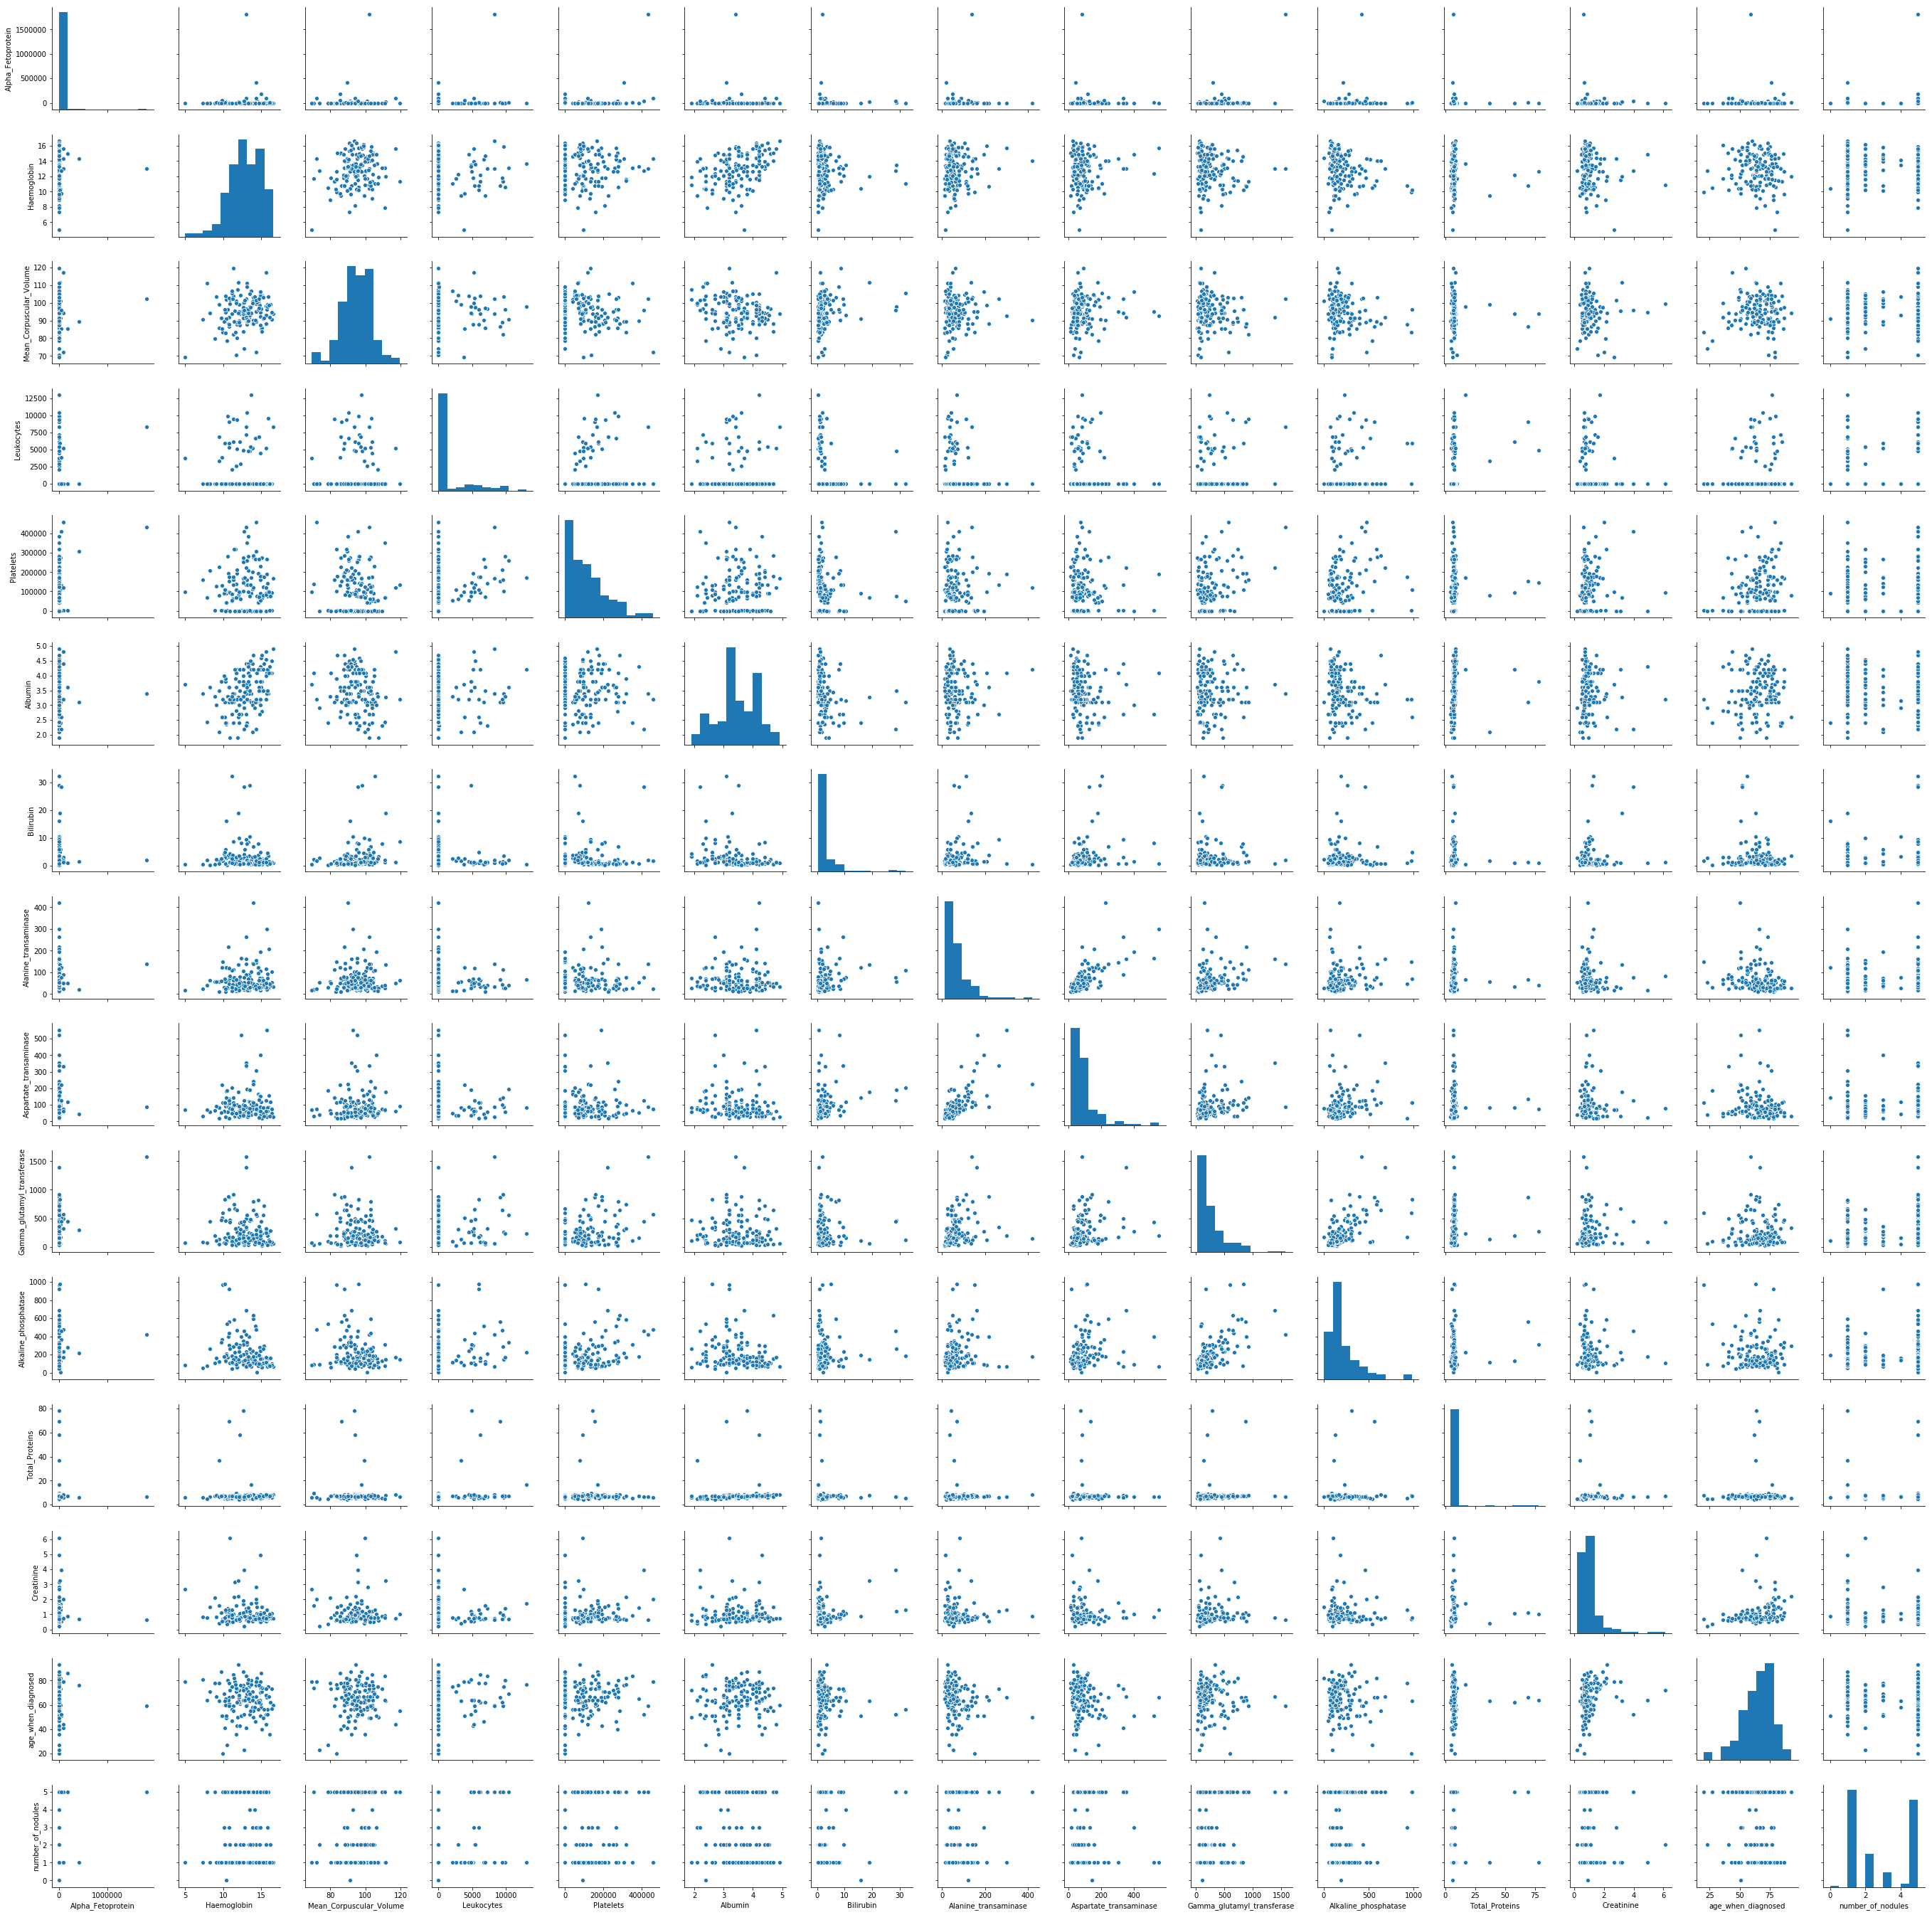

In [24]:
#df = df.apply(lambda x: pd.to_numeric(x, errors='coerce'))
sns.pairplot(df)

- from the output of the code **sns.pairplot(df)** in the cell above , the graphs where the variable we are trying to predict have no clear relationship. However , other varibles seems to have a noticiable relationship. For example , the attribute Gamma_glutamlu_transferase and alkaline phosphate have a positive linear relationship.

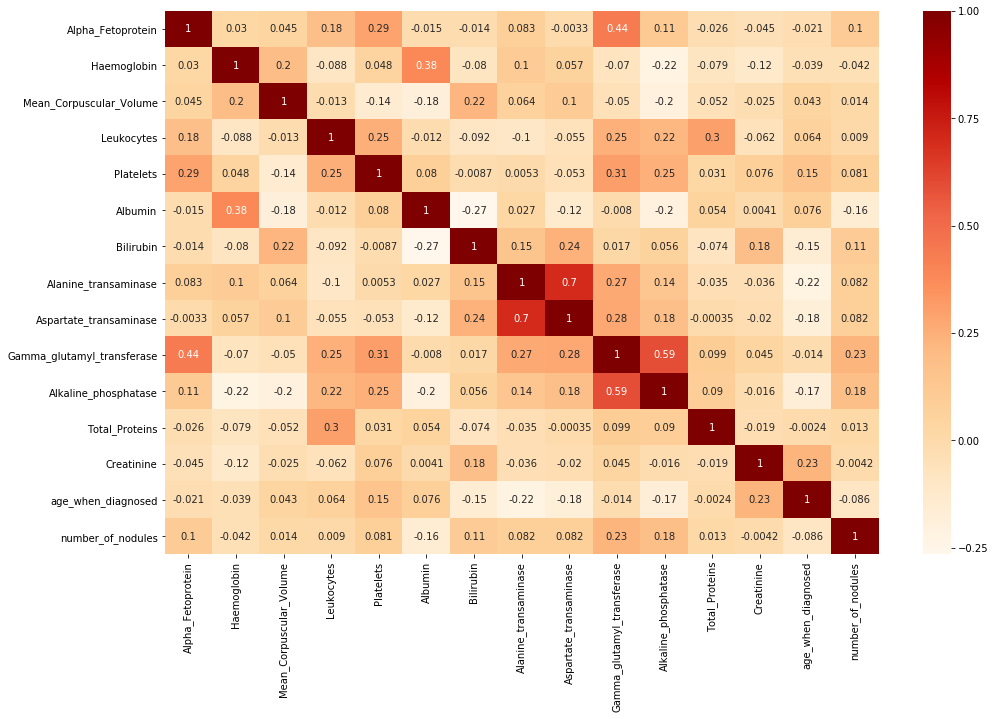

In [80]:
ax , fig = plt.subplots(figsize = ( 16,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix , annot = True , cmap = 'OrRd')

- As seen from the outputs of the codes from the last two cells above , there is weak relationship between all atttributes and the attribute we are trying to predict( nodule count). The code **sns.heatmap(correlation_matrix , annot = True , cmap = 'OrRd')** from above outputs how strong the correlation between two variables(attribute) , 1 meaning perfect correlation between varible and -1 being perfectly inversely correlated. Seen from above , the highest correlation score between the varible we are trying to predict(nodule count) and all the other varibles is only between 0.1 and -0.16 ( which is pretty low).Thus,I have  decided to keep all columns hoping that even the weak correlation between the attributes and the nodules count attribute will accumulately help increase the accuracy of the machine learning model.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


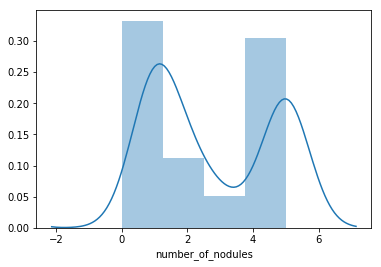

In [35]:
sns.distplot(df['number_of_nodules'])

- I did the code below to get the distribution plot of the attribute we are tying to predict. I have already done this above heowever it was hard to see as the graph was small so I decided to do it again here.



- As we can see the attribute we are tying to predict seems to have a bimodal distribution. This seems to suggest that the nodule count of lung cancer patients are divided into two major groups. I am thinking that bimodal distrubution could be explained away by the categorical varibales we didnt inculde and including them again may yield a more accurate machine learning model however I will try a model without the categorical attributes first and see how that goes.

### Training the linear Reggession ( machine learning ) model

- As we dont have seprate dataset to train machine learning model and another dataset to test the model, I need to split the currently available data into two: for training and for testing the model. The reason why we dont want to use the same dataset for traing and test set is to get a more useful indication of how good our model is since using the data which model trained on for testing it will likely to give a high result simply because it has seen these data before .The codes in the next four cell below will split the current datset into two.

In [36]:
#import library to split the dataset
from sklearn.model_selection import train_test_split

In [37]:
#create input data set
x_df = df.drop('number_of_nodules' , axis = 1)
#confirm the number of nodules is removed
x_df.head()

,Alpha_Fetoprotein,Haemoglobin,Mean_Corpuscular_Volume,Leukocytes,Platelets,Albumin,Bilirubin,Alanine_transaminase,Aspartate_transaminase,Gamma_glutamyl_transferase,Alkaline_phosphatase,Total_Proteins,Creatinine,age_when_diagnosed
0,95.0,13.7,106.6,4.9,99.0,3.4,2.1,34.0,41.0,183.0,150.0,7.1,0.70,67.0
2,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,78.0
3,2440.0,13.4,97.1,9.0,279.0,3.7,0.4,16.0,64.0,94.0,174.0,8.1,1.11,77.0
4,49.0,14.3,95.1,6.4,199.0,4.1,0.7,147.0,306.0,173.0,109.0,6.9,1.80,76.0
5,110.0,13.4,91.5,5.4,85.0,3.4,3.5,91.0,122.0,242.0,396.0,5.6,0.90,75.0


- As seen from the output of the code **x_df.head()** above , the column **number_of_nodules** not there anymore and so we have successfully created the input dataset.

In [38]:
#creata output data set(answers)
y_df = df['number_of_nodules']
#display the answer dataset
y_df.head()

0    1.0
2    5.0
3    2.0
4    1.0
5    1.0
Name: number_of_nodules, dtype: float64

- as seen from the output of the code **y_df.head()** above , only the one column is present which is the **number_of_nodules** column( this is the attribute we are tying to predict so we have sucessfully created the "answers" dataset.

In [39]:
#split the orginal data set into training set and test set
train_x , test_x , train_y , test_y = train_test_split(x_df , y_df , test_size =0.2 , random_state =42)

- the code in the cell above outputs two new datasets splitting the orginal datsaset we cleaned into two: 20% of the data becomes testing set and 80% of the data is the training set.

- the codes in the next two cells will create the machine learning model using regression( fitting a line) and will train this model.

In [40]:
#import library for machine learning model
from sklearn.linear_model import LinearRegression
#create the machine learming model
model = LinearRegression()

In [41]:
#train the model
model.fit(train_x ,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

- The code in the next cell below will test the model we had just trained in the last step.

In [42]:
#test the model
predicted = model.predict(test_x)

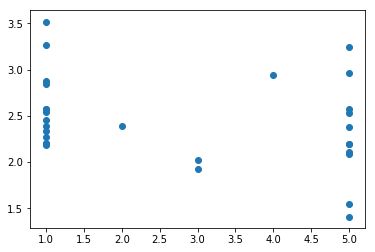

In [79]:
#plot the output of the model test
plt.scatter(test_y,predicted )

- I did the code above **plt.scatter(test_y,predicted )** to graphically see how accurate the model is and looking at the graph above I can tell that this model is not very accurate as the points on the graph does not lie in a line that slopes upwards 45 degress relative to x-axis.

In [44]:
#qunatify the accurracy of the model
model.score(test_x,test_y )

-0.23454016478855833

- I did the code above **model.score(test_x,test_y )** to quantify the "goodness" of the model. The output of this code is negative which means none of the variations the in the dataset that we are tying to predict are explained or predicted using the varibles(attributes) we used to predict them.

**Comments on the model:**
-  the accuracy of the model is too low so the model is not useful. This may be because of the small sample that is available. However given a larger sample the accuracy of the model may increase.